In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import poliastro 
import plotly

In [3]:
from poliastro.bodies import Earth

In [4]:
from poliastro.twobody import Orbit

In [5]:
from astropy import units as u

In [6]:
pos_km = np.array([8449.401305, 9125.794363, -17.461357])

In [7]:
vel_kms = np.array([-1.419072, 6.780149, 0.002865])

In [14]:
orb = Orbit.from_vectors(Earth, pos_km * u.km, vel_kms * u.km/u.s) # , epoch="2021-06-26-00:00:00.000-UTC")

In [15]:
orb


7252 x 42214 km x 0.1 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT)

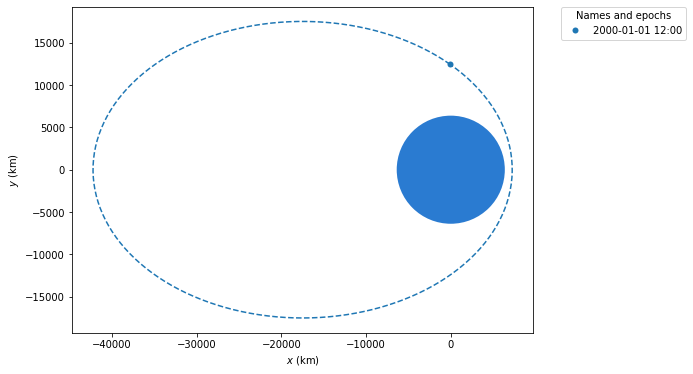

In [11]:
orb.plot()

In [16]:
orb.epoch

<Time object: scale='tt' format='jyear_str' value=J2000.000>

In [19]:
orb.energy

<Quantity -8.05810623 km2 / s2>

In [20]:
orb.argp

<Quantity 3.9546972 rad>

In [22]:
orb.t_p

<Quantity 1775.83381142 s>

In [23]:
orb.period

<Quantity 38709.99968497 s>

In [177]:
t_transfer = 0.5 * orb.period - orb.t_p
t_transfer = t_transfer - 800 * u.s
t_transfer

<Quantity 16779.16603107 s>

In [178]:
orb_transfer = orb.propagate(t_transfer)

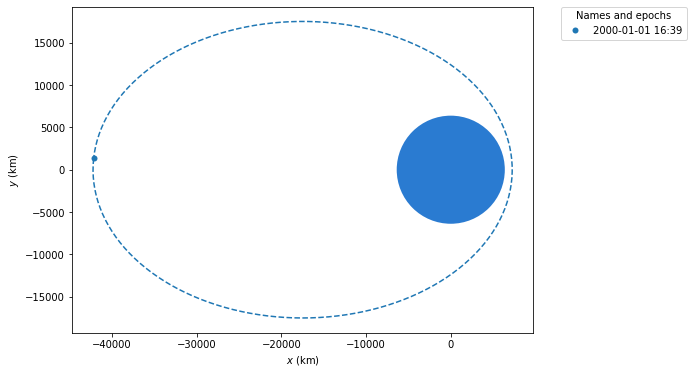

In [179]:
orb_transfer.plot()

In [180]:
from astropy.coordinates import *

In [181]:
pos = orb_transfer.represent_as(CartesianRepresentation)
pos

<CartesianRepresentation (x, y, z) in km
    (-29817.20742028, 29811.14438425, 61.11512723)>

In [182]:
r_mag = np.sqrt(np.dot(pos.xyz.value, pos.xyz.value))
r_mag

42163.65642234962

In [183]:
35785 + 6371

42156

In [184]:
vel = orb_transfer.represent_as(CartesianRepresentation, CartesianDifferential).differentials['s']
vel

<CartesianDifferential (d_x, d_y, d_z) in km / s
    (-1.26731149, -1.08857791, 0.00261672)>

In [185]:
v_mag = np.sqrt(np.dot(vel.d_xyz.value, vel.d_xyz.value))
v_mag

1.6706546980907149

In [186]:
weight = 1.1
geo_vel = 2 * np.pi * r_mag  / (24 * 60 * 60)
geo_vel

3.066227621873557

In [187]:
delta_v = geo_vel - v_mag
delta_v

1.3955729237828423

In [188]:
import datetime

In [189]:
date_start = "2021-06-26-19:20:00.000000-UTC"

In [190]:
dstart = datetime.datetime.strptime("2021-06-26-19:20", "%Y-%m-%d-%H:%M")
dstart

datetime.datetime(2021, 6, 26, 19, 20)

In [191]:
t_delta_transfer = datetime.timedelta(seconds=t_transfer.value)

In [192]:
(dstart + t_delta_transfer).strftime("%Y-%m-%d-%H:%M:%S")

'2021-06-26-23:59:39'

In [193]:
(dstart + t_delta_transfer).strftime("%Y-%m-%d-%H:%M:%S-%Z")

'2021-06-26-23:59:39-'

In [194]:
curr_vel = vel.d_xyz.value
curr_vel

array([-1.26731149, -1.08857791,  0.00261672])

In [198]:
axis = np.cross(pos.xyz.value, curr_vel)
axis = axis / np.sqrt(np.dot(axis, axis))
axis

array([2.05778863e-03, 8.13496869e-06, 9.99997883e-01])

In [219]:
desired_vel_dir = np.cross(axis, pos.xyz.value)
desired_vel_dir = desired_vel_dir / np.sqrt(np.dot(desired_vel_dir, desired_vel_dir))
desired_vel = 1.0027 * geo_vel * desired_vel_dir
desired_vel

array([-2.17377636, -2.17422768,  0.00449087])

In [220]:
desired_vel - curr_vel

array([-0.90646487, -1.08564977,  0.00187415])

In [221]:
r_mag

42163.65642234962

In [217]:
# 1.0 gets 41933.410623215386 instead of 42164
# 1.1 gets 52926
# 1.001 gets 42016
# 1.0015 gets 42058
# 1.002 gets 42100
# 1.003 gets 42184

In [218]:
print("ticket{sierra942462echo2:GJobSCHw4qxUSvnotvDee8IUEbURCg18NYUO1P8mBFNyIpQrF6smkzUdgvskqYlRSg}")
print("2021-06-26-23:59:39.000-UTC")

ticket{sierra942462echo2:GJobSCHw4qxUSvnotvDee8IUEbURCg18NYUO1P8mBFNyIpQrF6smkzUdgvskqYlRSg}
2021-06-26-23:59:39.000-UTC
